#EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Final Project/Employee.csv')

In [ ]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [ ]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [ ]:
df.duplicated().sum()

1889

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
descriptive_stats=df.describe()
print("Statistik Deskriptif:")
print(descriptive_stats)

Statistik Deskriptif:
       JoiningYear  PaymentTier          Age  ExperienceInCurrentDomain  \
count  2764.000000  2764.000000  2764.000000                2764.000000   
mean   2015.090449     2.636035    30.952967                   2.644356   
std       1.885943     0.624001     5.108872                   1.610610   
min    2012.000000     1.000000    22.000000                   0.000000   
25%    2013.000000     2.000000    27.000000                   1.000000   
50%    2015.000000     3.000000    30.000000                   2.000000   
75%    2017.000000     3.000000    35.000000                   4.000000   
max    2018.000000     3.000000    41.000000                   7.000000   

        LeaveOrNot  
count  2764.000000  
mean      0.393632  
std       0.488643  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000  


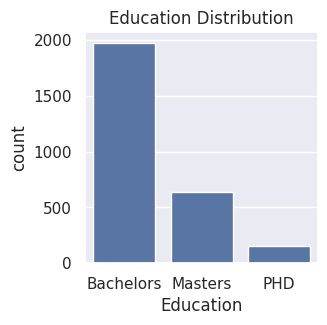

Education
Bachelors    1971
Masters       637
PHD           156
Name: count, dtype: int64

In [ ]:
#Distribusi Kolom Education
plt.figure(figsize=(3,3))
sns.countplot(x = 'Education', data = df)
plt.title('Education Distribution')
plt.show()

df['Education'].value_counts()

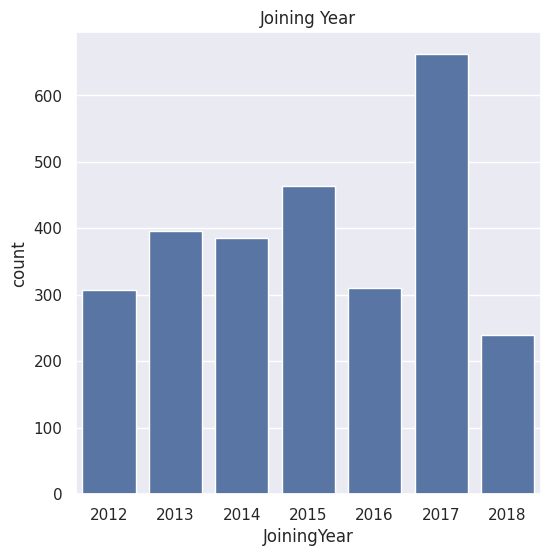

JoiningYear
2017    662
2015    464
2013    396
2014    385
2016    310
2012    308
2018    239
Name: count, dtype: int64

In [ ]:
#Distribusi Kolom Joining Year
plt.figure(figsize=(6,6))
sns.countplot(x = 'JoiningYear', data = df)
plt.title('Joining Year')
plt.show()
df['JoiningYear'].value_counts()

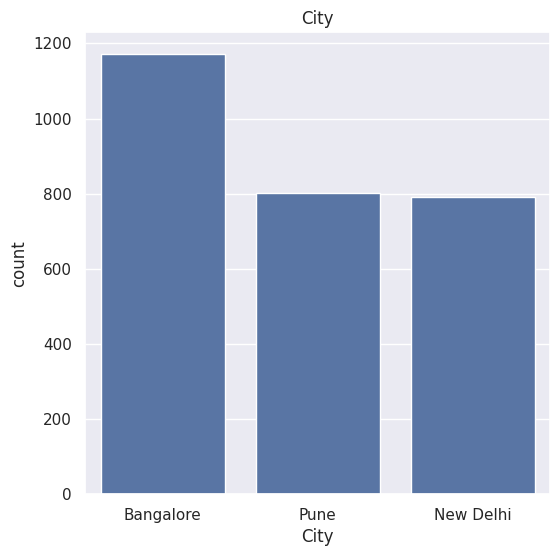

City
Bangalore    1171
Pune          801
New Delhi     792
Name: count, dtype: int64

In [ ]:
#Distribusi Kolom City
plt.figure(figsize=(6,6))
sns.countplot(x = 'City', data = df)
plt.title('City')
plt.show()
df['City'].value_counts()

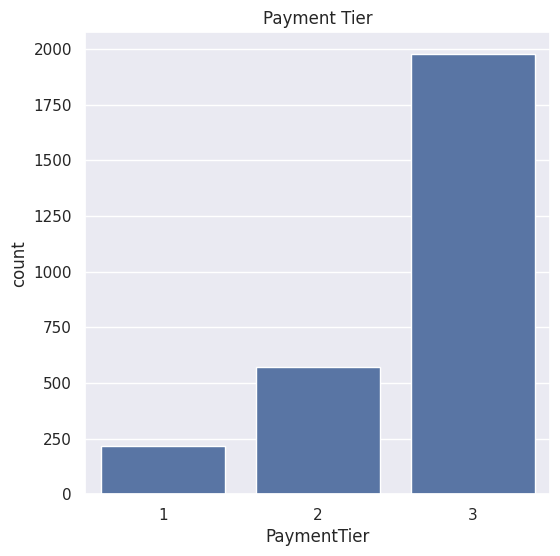

PaymentTier
3    1976
2     570
1     218
Name: count, dtype: int64

In [ ]:
#Distribusi Kolom Payment Tier
plt.figure(figsize=(6,6))
sns.countplot(x = 'PaymentTier', data = df)
plt.title('Payment Tier')
plt.show()
df['PaymentTier'].value_counts()

<ipython-input-47-b6d74f1c497e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


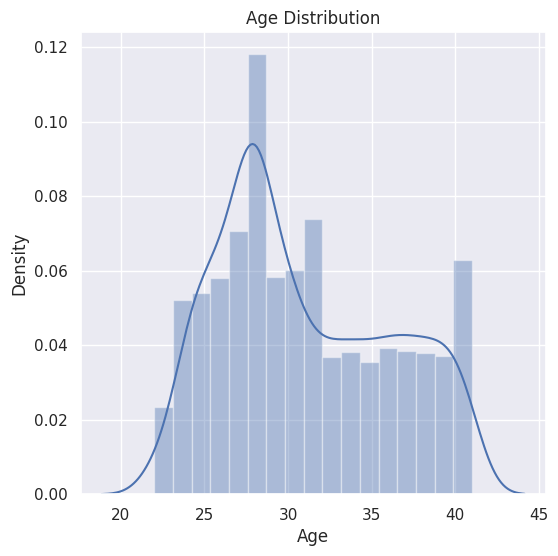

In [ ]:
#Distribusi Kolom Age
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['Age'])
plt.title('Age Distribution')
plt.show()

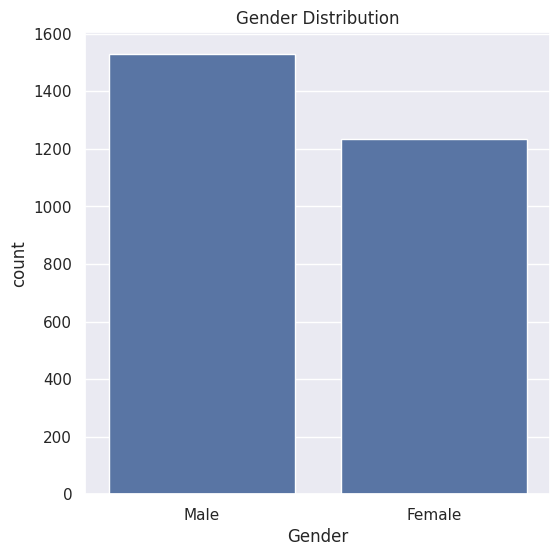

Gender
Male      1529
Female    1235
Name: count, dtype: int64

In [ ]:
#Distribusi Kolom Gender
plt.figure(figsize=(6,6))
sns.countplot(x = 'Gender', data = df)
plt.title('Gender Distribution')
plt.show()

df['Gender'].value_counts()

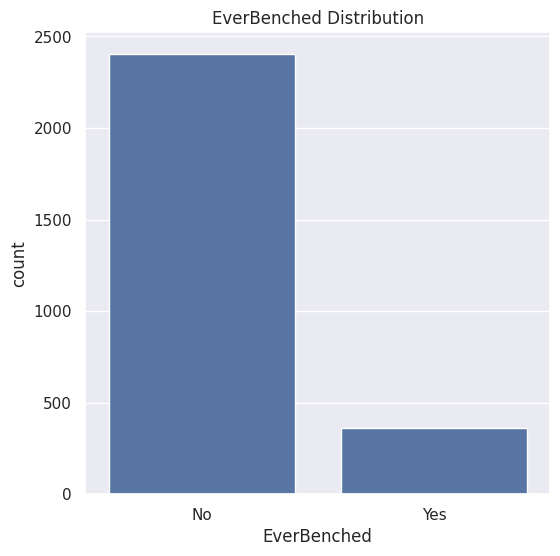

EverBenched
No     2403
Yes     361
Name: count, dtype: int64

In [ ]:
#Distribusi Kolom EverBenched
plt.figure(figsize=(6,6))
sns.countplot(x = 'EverBenched', data = df)
plt.title('EverBenched Distribution')
plt.show()

df['EverBenched'].value_counts()

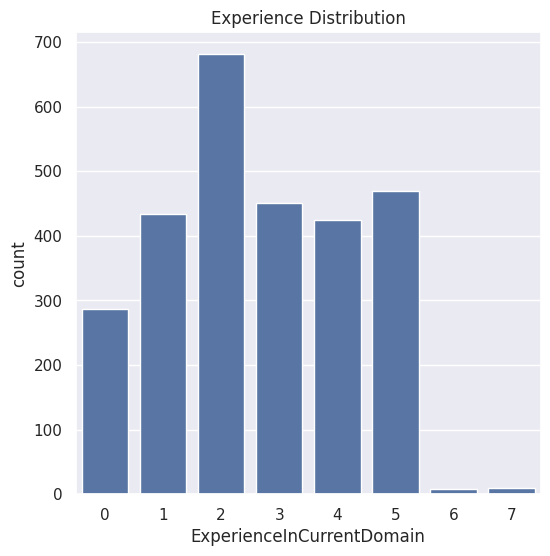

ExperienceInCurrentDomain
2    681
5    470
3    451
1    433
4    425
0    287
7      9
6      8
Name: count, dtype: int64

In [ ]:
#Distribusi Kolom Experience
plt.figure(figsize=(6,6))
sns.countplot(x = 'ExperienceInCurrentDomain', data = df)
plt.title('Experience Distribution')
plt.show()

df['ExperienceInCurrentDomain'].value_counts()

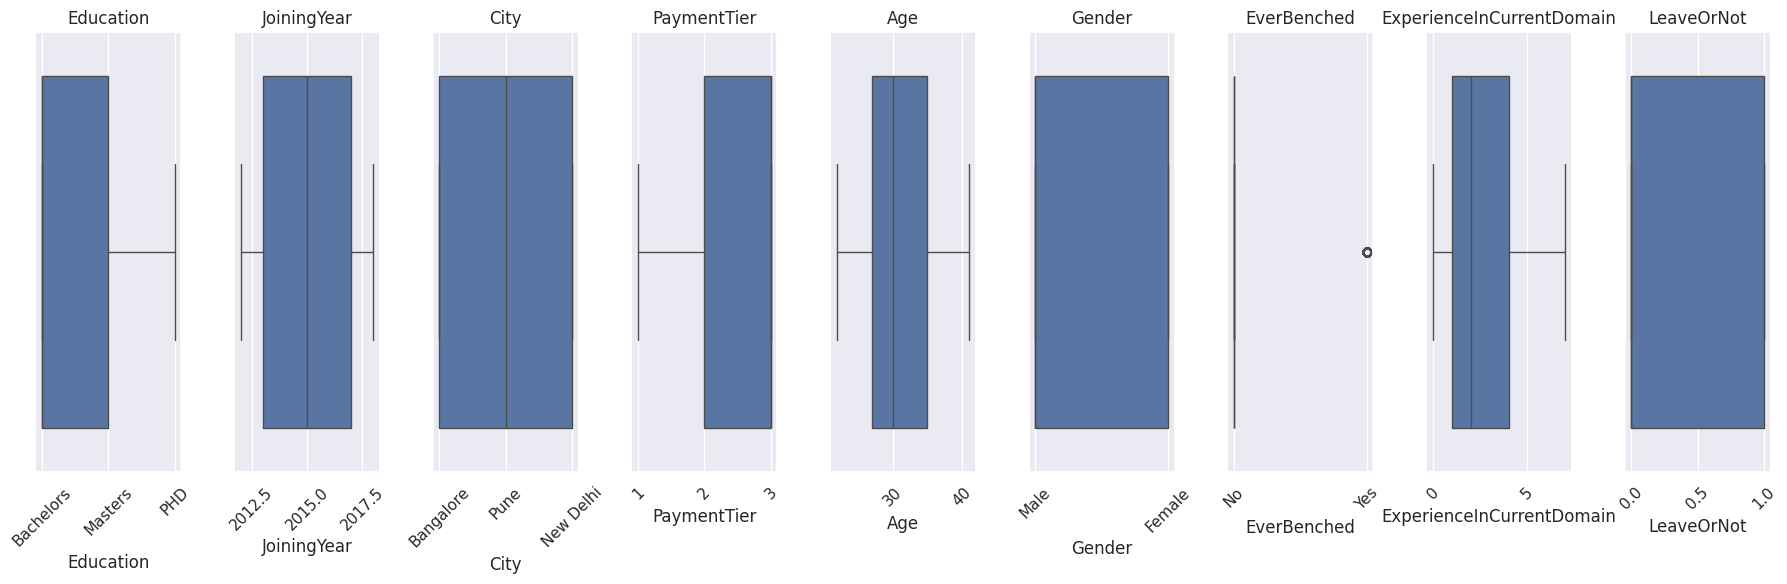

In [ ]:
#Box plot untuk setiap kolom untuk melihat adanya data outlier
fig, axes = plt.subplots(nrows=1, ncols=9, figsize=(18, 6))

for i, col in enumerate(df.columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#Preprocessing

In [ ]:
from scipy.stats import chi2_contingency

# Lakukan uji chi-square untuk setiap fitur kategorik dan target
results = {}
for cat in df:
    # Buat tabel kontingensi antara fitur prediktor dan target
    contingency_table = pd.crosstab(df[cat], df['LeaveOrNot'])

    # Lakukan uji chi-square
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

    # Simpan hasil uji chi-square
    results[cat] = {'chi2_stat': chi2_stat, 'p_val': p_val, 'dof': dof, 'expected': expected}

# Tampilkan hasil
for predictor, result in results.items():
    print(f"Chi-square test between {predictor} and target:")
    print("Chi-square statistic:", result['chi2_stat'])
    print("p-value:", result['p_val'])
    print("Degrees of freedom:", result['dof'])
    print()

Chi-square test between Education and target:
Chi-square statistic: 37.51437379018137
p-value: 7.142614900414181e-09
Degrees of freedom: 2

Chi-square test between JoiningYear and target:
Chi-square statistic: 415.94308618520535
p-value: 1.0429432811313474e-86
Degrees of freedom: 6

Chi-square test between City and target:
Chi-square statistic: 63.456310788157964
p-value: 1.6620236195219495e-14
Degrees of freedom: 2

Chi-square test between PaymentTier and target:
Chi-square statistic: 130.50117378514537
p-value: 4.592299156674247e-29
Degrees of freedom: 2

Chi-square test between Age and target:
Chi-square statistic: 64.21204627948077
p-value: 8.194550405881967e-07
Degrees of freedom: 19

Chi-square test between Gender and target:
Chi-square statistic: 99.4786554526017
p-value: 1.982889303910607e-23
Degrees of freedom: 1

Chi-square test between EverBenched and target:
Chi-square statistic: 3.589789188386378
p-value: 0.05813561756538128
Degrees of freedom: 1

Chi-square test between E

In [ ]:
print(df.columns)

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import TransformerMixin, BaseEstimator
import numpy as np

# Label Encoder untuk kolom ordinal
class MultiColumnLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns  # array of column names to encode
        self.encoders = {col: LabelEncoder() for col in columns}

    def fit(self, X, y=None):
        for col in self.columns:
            self.encoders[col].fit(X[col])
        return self

    def transform(self, X, y=None):
        output = X.copy()
        for col in self.columns:
            output[col] = self.encoders[col].transform(output[col])
        return output

    def get_feature_names_out(self, input_features=None):
        return self.columns if self.columns is not None else input_features

# Menentukan fitur numerik dan kategori
numeric_features = ['JoiningYear', 'PaymentTier','ExperienceInCurrentDomain']
categorical_features = ['City', 'Gender']
ordinal_features = ['Education', 'EverBenched']

# Preprocessing untuk fitur numerik (imputasi dan standardisasi)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing untuk fitur kategori (One-Hot Encoding)
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first'))
])

# Preprocessing untuk fitur ordinal (Label Encoding)
ordinal_transformer = Pipeline(steps=[
    ('label_encoder', MultiColumnLabelEncoder(columns=ordinal_features))
])

# Menggabungkan preprocessing untuk numerik, kategori, dan ordinal
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features)
    ])

# Memisahkan fitur dan target
X = df.drop('LeaveOrNot', axis=1)
y = df['LeaveOrNot']

# Membangun pipeline dengan preprocessing dan model (Logistic Regression)
prepro = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Melatih model
prepro.fit(X, y)

# Menggabungkan hasil preprocessing dengan data asli untuk analisis lebih lanjut
X_transformed = prepro.named_steps['preprocessor'].transform(X)
df = pd.DataFrame(X_transformed, columns=preprocessor.get_feature_names_out())
df['LeaveOrNot'] = y.values

print("\nDataFrame Gabungan setelah Preprocessing:")
print(df)


DataFrame Gabungan setelah Preprocessing:
      num__JoiningYear  num__PaymentTier  num__ExperienceInCurrentDomain  \
0             1.012701          0.583382                       -1.642132   
1            -1.108637         -2.622319                        0.220853   
2            -0.578303          0.583382                       -0.400142   
3             0.482367          0.583382                        1.462843   
4             1.012701          0.583382                       -0.400142   
...                ...               ...                             ...   
2759          1.012701         -1.019468                       -0.400142   
2760          0.482367          0.583382                       -0.400142   
2761         -1.108637         -1.019468                       -0.400142   
2762          1.543036          0.583382                        1.462843   
2763         -1.638972          0.583382                       -0.400142   

      cat__City_New Delhi  cat__City_Pune  c

#Pembagian data

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Pembagian data dari kolom "LeaveOrNot"

X = df.drop(columns="LeaveOrNot", axis=1)
y = df['LeaveOrNot']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25, stratify=y)

In [ ]:
print(X.shape)
print(y.shape)

(2764, 8)
(2764,)


In [ ]:
sm = SMOTE(random_state=30)
X_sampling, y_sampling = sm.fit_resample(X,y)

In [ ]:
print(X_sampling.shape)
print(y_sampling.shape)

(3352, 8)
(3352,)


In [ ]:
X_sampling

,num__JoiningYear,num__PaymentTier,num__ExperienceInCurrentDomain,cat__City_New Delhi,cat__City_Pune,cat__Gender_Male,ord__Education,ord__EverBenched
0,1.012701,0.583382,-1.642132,0.000000,0.0,1.0,0.0,0.0
1,-1.108637,-2.622319,0.220853,0.000000,1.0,0.0,0.0,0.0
2,-0.578303,0.583382,-0.400142,1.000000,0.0,0.0,0.0,0.0
3,0.482367,0.583382,1.462843,0.000000,0.0,1.0,1.0,0.0
4,1.012701,0.583382,-0.400142,0.000000,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
3347,-1.108637,-1.019468,0.765101,1.000000,0.0,0.0,0.0,0.0
3348,1.543036,0.583382,-0.400142,1.000000,0.0,1.0,1.0,0.0
3349,1.543036,0.583382,1.462843,0.355113,0.0,1.0,1.0,1.0
3350,-0.047968,-1.019468,-0.400142,0.000000,1.0,0.0,0.0,1.0


In [ ]:
y_sampling

0       0
1       1
2       0
3       1
4       1
       ..
3347    1
3348    1
3349    1
3350    1
3351    1
Name: LeaveOrNot, Length: 3352, dtype: int64

#Pemodelan

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Inisialisasi model-model
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier()
}

# Melatih dan mengevaluasi setiap model
for model_name, model in models.items():

    model.fit(X_sampling, y_sampling)

    predictions = model.predict(X_test)

    classification_matrix = classification_report(y_test, predictions)

    # Cetak hasil evaluasi model
    print(f"\n=== Evaluasi Model {model_name} ===")
    print(classification_matrix)


=== Evaluasi Model Logistic Regression ===
              precision    recall  f1-score   support

           0       0.73      0.67      0.70       419
           1       0.55      0.62      0.59       272

    accuracy                           0.65       691
   macro avg       0.64      0.65      0.64       691
weighted avg       0.66      0.65      0.65       691


=== Evaluasi Model K-Nearest Neighbors ===
              precision    recall  f1-score   support

           0       0.84      0.92      0.87       419
           1       0.85      0.72      0.78       272

    accuracy                           0.84       691
   macro avg       0.84      0.82      0.83       691
weighted avg       0.84      0.84      0.84       691


=== Evaluasi Model Random Forest ===
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       419
           1       0.91      0.75      0.82       272

    accuracy                           0.87       691
  

#Optimasi Model

In [ ]:
from sklearn.model_selection import GridSearchCV

# Parameter grid untuk masing-masing model
param_grid = {
    "Logistic Regression": {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    },
    "K-Nearest Neighbors": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200, 300],
        'max_depth': [None, 10, 20, 30, 40],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Support Vector Machine": {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf']
    },
    "Naive Bayes": {
        'var_smoothing': [1e-9, 1e-8, 1e-7]
    },
     "Decision Tree": {
        'max_depth': [None, 10, 20, 30, 40],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
}

# Inisialisasi model-model
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier()
}

# Melakukan Grid Search dan evaluasi untuk setiap model
for model_name, model in models.items():
    print(f"\n=== Tuning Model {model_name} ===")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[model_name], cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_sampling, y_sampling)

    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X_test)

    print(f"Best parameters: {grid_search.best_params_}")
    classification_matrix = classification_report(y_test, predictions)
    print(classification_matrix)


=== Tuning Model Logistic Regression ===
Best parameters: {'C': 0.1, 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.73      0.68      0.70       419
           1       0.55      0.62      0.59       272

    accuracy                           0.65       691
   macro avg       0.64      0.65      0.64       691
weighted avg       0.66      0.65      0.66       691


=== Tuning Model K-Nearest Neighbors ===
Best parameters: {'n_neighbors': 7, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.84      0.98      0.90       419
           1       0.96      0.71      0.81       272

    accuracy                           0.87       691
   macro avg       0.90      0.84      0.86       691
weighted avg       0.88      0.87      0.87       691


=== Tuning Model Random Forest ===
Best parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
              pre